# Decision tree

In [2]:
#Imports
import pandas as pd
import numpy as np

## Preproccesing data

In [3]:
df = pd.read_csv("data\cancer-data.csv",header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [5]:
df.columns = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiant', 'class']

In [6]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiant,class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


Checking for missing values

In [7]:
df = df.replace('?', np.nan)

In [8]:
import missingno as msno

msno.matrix(df.iloc[:,0:16],figsize=(16,2))

In [9]:
df['breast-quad'].isna().sum()

1

Only a single missing value in the entire dataset. Easier to just remove the row. Or so I tought. Seems like missingno cannot be trusted.

In [10]:
df['node-caps'].isna().sum()

8

node-caps also has null values. Anyways, let's just drop them all.

In [11]:
df.count()

age            286
menopause      286
tumor-size     286
inv-nodes      286
node-caps      278
deg-malig      286
breast         286
breast-quad    285
irradiant      286
class          286
dtype: int64

In [12]:
df.dropna(inplace = True)

In [13]:
df.count()

age            277
menopause      277
tumor-size     277
inv-nodes      277
node-caps      277
deg-malig      277
breast         277
breast-quad    277
irradiant      277
class          277
dtype: int64

## Splitting data

In [14]:
from sklearn.model_selection import train_test_split

x_data = df.drop(labels=['class'], axis=1)
y_data = df['class']

x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [15]:
y_test.unique()

array(["'no-recurrence-events'", "'recurrence-events'"], dtype=object)

Spontaneously decided to try the sklearn implmenetation.

In [16]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [17]:
clf.fit(x_train, y_train)

ValueError: could not convert string to float: "'no'"

Seems like I cannot pass string values to the decision tree. I must encode them beforehand. - https://stackoverflow.com/questions/30384995/randomforestclassfier-fit-valueerror-could-not-convert-string-to-float

In [18]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [19]:
le.transform(y_train) 

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [20]:
x_train_encoded = x_train.copy()

for column in x_train.columns:
    le.fit(x_train[column])
    x_train_encoded[column] = le.transform(x_train[column])

In [21]:
x_train_encoded.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiant
268,3,0,5,0,0,0,0,2,0
130,1,2,5,0,0,1,0,3,0
35,0,2,2,0,0,0,0,1,0
91,0,2,5,4,0,2,1,2,1
272,0,2,3,4,1,1,1,2,1


In [22]:
le.fit(y_train)
y_train_encoded = le.transform(y_train)

In [23]:
clf.fit(x_train_encoded, y_train_encoded)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
x_test_encoded = x_test.copy()

for column in x_test.columns:
    le.fit(x_test[column])
    x_test_encoded[column] = le.transform(x_test[column])

In [25]:
y_test_predicted = clf.predict(x_test_encoded)
y_test_predicted

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [26]:
le.fit(y_test)
y_test_encoded = le.transform(y_test)

In [27]:
y_test_encoded

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_encoded, y_test_predicted)

0.6964285714285714

## ID3 Algoritm Implementation

### Entropy

Turns out, that for my implementation it's going to be easier to merge back the x and y columns.

In [30]:
train = pd.concat([x_train, y_train], axis=1)

Now we can filter the dataframe by some column value and easily read the Y column.

In [31]:
train[train['age'] == "'70-79'"]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiant,class
253,'70-79','ge40','0-4','0-2','no','1','left','right_low','no','no-recurrence-events'
53,'70-79','ge40','40-44','0-2','no','1','right','right_up','no','no-recurrence-events'
260,'70-79','ge40','20-24','0-2','no','3','left','left_up','no','no-recurrence-events'


In [32]:
train[train['age'] == "'70-79'"]['class']

253    'no-recurrence-events'
53     'no-recurrence-events'
260    'no-recurrence-events'
Name: class, dtype: object

In [33]:
#columnData contains only the Y column
def Entropy(columnData):
    
    entropy = 0
    
    for decision in columnData.unique():
        decisionProbability = (columnData == decision).sum() / columnData.count()
        
        entropy = entropy - decisionProbability * np.log2(decisionProbability)
        
    return entropy
    
#     positiveProbability = (columnData == decision).sum() / columnData.count()
#     negativeProbability = (columnData != decision).sum() / columnData.count()
    
#     #Special case when we need to compute 0 times -infinity
#     if(positiveProbability == 0 or positiveProbability == 1):
#         return 0
    
#     return - positiveProbability * np.log2(positiveProbability) - negativeProbability * np.log2(negativeProbability)

In [35]:
Entropy(train[train['age'] == "'30-39'"]['class'])

0.9990102708804813

Entropy is very high, as the split between *no-recurrence-events* and *recurrence-events* is almost 50/50 - *14/13*.

### Gain

In [36]:
#Dataframe for the node we're in, name of the column the next node could be, name of the decision column
def Gain(df, columnName, className):
    gain = 0
    
    gain = gain + Entropy(df[className])
    
    for value in df[columnName].unique():
        valueRows = df[df[columnName] == value]
        valueRowsCount = valueRows.count().iloc[0]
        totalRows = df.count().iloc[0]
                
        gain = gain - valueRowsCount / totalRows * Entropy(valueRows[className])
    
    return gain

In [37]:
Gain(train, 'age', 'class')

0.02288886134864976

### Tree

In [87]:
class Node:
                
    #value
    #Node children 
    #isLeaf
    
    #Constructor
    def __init__(self, value, isLeaf = False):
        self.value = value
        self.children = {}
        self.isLeaf = isLeaf
        
    #Getters
    def Value(self):
        return self.value
    
    def IsLeafNode(self):
        return self.isLeaf
    
    def Children(self):
        return self.children
    
    #Setters    
    def AddChild(self, name, node):
        self.children[name] = node
        
class Tree:
    
    def __init__(self, head):
        self.head = head
        
    #Getters
    def Head(self):
        return self.head

In [88]:
node = Node('age')
node.Value()

'age'

In [89]:
node.IsLeafNode()

False

In [90]:
child = Node('class', True)
node.AddChild('class', child)
node.Children()['class'].IsLeafNode()

True

In [42]:
tree = Tree(node)
tree.Head().Value()

'age'

### Constructing the decision tree

Let's try it with the weather data. It's simpler and we know the desired outcome.
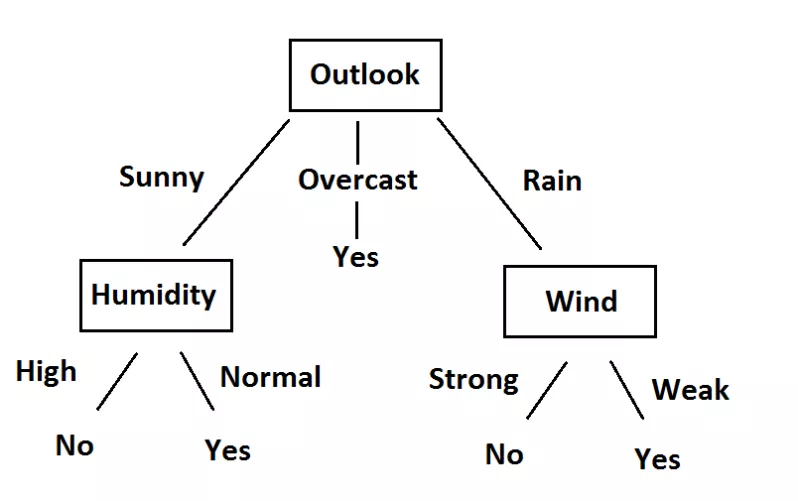


In [116]:
weather = pd.read_csv('data\weather.csv', header = 0)
weather

,Outlook,Temp,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [220]:
import operator

#Dataframe left, column names that have already been visited up to the root, decision column name
def AddNode(df, excludedColumns, decisionColumn):
    treshold = 0
    gains = {}

    #Explore the gain for each column in the dataframe, excluding the already visited columns up to the root
    for column in df.columns:
        if column not in excludedColumns:
            gains[column] = Gain(df, column, decisionColumn)

    #Select the column with the highest gain
    maxGain = max(gains.items(), key=operator.itemgetter(1))[1]
    maxGainColumn = max(gains.items(), key=operator.itemgetter(1))[0]

    #If the gain is above the treshold, recursively explore the gain for each unique value in the column
    if maxGain > treshold:
        newNode = Node(maxGainColumn, False)
        excludedColumnsPath = excludedColumns.copy()
        excludedColumnsPath.append(maxGainColumn)
        
        #For each value in the column, explore the options for another branch node
        for columnValue in df[maxGainColumn].unique():
            childNode = AddNode(df[df[maxGainColumn] == columnValue], excludedColumnsPath, decisionColumn)
            newNode.AddChild(columnValue, childNode)

        return newNode
    #If the gain is below the treshold, then we choose the most common decision as a leaf node
    else:
        decision = df[decisionColumn].value_counts().idxmax()
        return Node(decision, True)
    

In [221]:
visitedColumns = ['Decision']
decisionColumn = 'Decision'

headNode = AddNode(weather, visitedColumns, decisionColumn)    

In [223]:
def PrintChildren(node, space):
    #print(space, node.Value())
    for childKey, childValue in node.Children().items():    
        print(space, childKey, '->', childValue.Value().upper())
        PrintChildren(childValue, space + '  ')
        
def PrintTree(head):
    print(head.Value().upper())
    PrintChildren(head, ' ')

In [224]:
PrintTree(headNode)

OUTLOOK
  Sunny -> HUMIDITY
    High -> NO
    Normal -> YES
  Overcast -> YES
  Rain -> WIND
    Weak -> YES
    Strong -> NO


Hooray! The tree is correct! Now let's pray it'll work for the breast cancer dataset as well.

In [225]:
train.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiant,class
268,'60-69','ge40','30-34','0-2','no','1','left','left_up','no','no-recurrence-events'
130,'40-49','premeno','30-34','0-2','no','2','left','right_low','no','no-recurrence-events'
35,'30-39','premeno','15-19','0-2','no','1','left','left_low','no','no-recurrence-events'
91,'30-39','premeno','30-34','3-5','no','3','right','left_up','yes','recurrence-events'
272,'30-39','premeno','20-24','3-5','yes','2','right','left_up','yes','no-recurrence-events'


In [226]:
visitedColumns = ['class']
decisionColumn = 'class'

headNode = AddNode(train, visitedColumns, decisionColumn)    

In [227]:
PrintTree(headNode)

INV-NODES
  '0-2' -> TUMOR-SIZE
    '30-34' -> IRRADIANT
      'no' -> AGE
        '60-69' -> BREAST-QUAD
          'left_up' -> 'NO-RECURRENCE-EVENTS'
          'left_low' -> 'NO-RECURRENCE-EVENTS'
          'central' -> 'RECURRENCE-EVENTS'
        '40-49' -> 'NO-RECURRENCE-EVENTS'
        '50-59' -> BREAST-QUAD
          'left_low' -> 'NO-RECURRENCE-EVENTS'
          'central' -> 'NO-RECURRENCE-EVENTS'
          'right_up' -> MENOPAUSE
            'premeno' -> 'RECURRENCE-EVENTS'
            'ge40' -> 'NO-RECURRENCE-EVENTS'
          'left_up' -> 'NO-RECURRENCE-EVENTS'
        '30-39' -> DEG-MALIG
          '3' -> 'NO-RECURRENCE-EVENTS'
          '1' -> 'RECURRENCE-EVENTS'
          '2' -> 'NO-RECURRENCE-EVENTS'
      'yes' -> DEG-MALIG
        '3' -> 'RECURRENCE-EVENTS'
        '2' -> NODE-CAPS
          'no' -> 'NO-RECURRENCE-EVENTS'
          'yes' -> 'RECURRENCE-EVENTS'
        '1' -> 'RECURRENCE-EVENTS'
    '15-19' -> MENOPAUSE
      'premeno' -> BREAST-QUAD
        'left_low' -

It's aliveee!! Now let's see how the prediction would go.

In [240]:
def Predict(head, x):
    currentNode = head
    
    while True:
        columnValue = x[currentNode.Value()].iloc[0]
        currentNode = currentNode.Children()[columnValue]
        
        if currentNode.IsLeafNode():
            return currentNode.Value()

In [249]:
x_test[0:5]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiant
32,'50-59','ge40','25-29','0-2','no','3','left','right_up','no'
132,'40-49','premeno','30-34','0-2','no','3','right','right_up','no'
227,'40-49','ge40','30-34','0-2','no','2','left','left_up','yes'
148,'40-49','premeno','40-44','0-2','no','2','right','left_low','no'
263,'40-49','premeno','20-24','3-5','yes','2','right','right_up','yes'


In [260]:
y_test[0:5]

32     'no-recurrence-events'
132       'recurrence-events'
227    'no-recurrence-events'
148    'no-recurrence-events'
263       'recurrence-events'
Name: class, dtype: object

In [261]:
for i in range(5):
    print(Predict(headNode, x_test[i:i+1]))

'recurrence-events'
'no-recurrence-events'
'no-recurrence-events'
'no-recurrence-events'
'recurrence-events'


3/5. It may just be working. Let's assemble it all and try it.

In [318]:
class Node:
                
    #Constructor
    def __init__(self, value, isLeaf = False):
        self.value = value
        self.children = {}
        self.isLeaf = isLeaf
        
    #Getters
    def Value(self):
        return self.value
    
    def IsLeafNode(self):
        return self.isLeaf
    
    def Children(self):
        return self.children
    
    #Setters    
    def AddChild(self, name, node):
        self.children[name] = node
        
class DecisionTree:
            
    def Train(self, df, decisionColumn):
        visitedColumns = [decisionColumn]
        self.head = AddNode(df, visitedColumns, decisionColumn)    
        
    def Predict(self, x):
        currentNode = self.head
    
        while True:
            columnValue = x[currentNode.Value()].iloc[0]
            
            #Quick fix in the case when a branch has not explored an option in the the test
            #Better solution would be to calculate the decision for each branch node
            if columnValue not in currentNode.Children():
                columnValue = list(currentNode.Children())[0]
             
            currentNode = currentNode.Children()[columnValue]

            if currentNode.IsLeafNode():
                return currentNode.Value()
        
    def PrintTree(self):
        print(self.head.Value().upper())
        PrintChildren(self.head, ' ')      

    #Getters
    def Head(self):
        return self.head
    
    #'Private'
    import operator

    #Dataframe left, column names that have already been visited up to the root, decision column name
    def AddNode(df, excludedColumns, decisionColumn):
        treshold = 0
        gains = {}

        #Explore the gain for each column in the dataframe, excluding the already visited columns up to the root
        for column in df.columns:
            if column not in excludedColumns:
                gains[column] = Gain(df, column, decisionColumn)

        #Select the column with the highest gain
        maxGain = max(gains.items(), key=operator.itemgetter(1))[1]
        maxGainColumn = max(gains.items(), key=operator.itemgetter(1))[0]

        #If the gain is above the treshold, recursively explore the gain for each unique value in the column
        if maxGain > treshold:
            newNode = Node(maxGainColumn, False)
            excludedColumnsPath = excludedColumns.copy()
            excludedColumnsPath.append(maxGainColumn)

            #For each value in the column, explore the options for another branch node
            for columnValue in df[maxGainColumn].unique():
                childNode = AddNode(df[df[maxGainColumn] == columnValue], excludedColumnsPath, decisionColumn)
                newNode.AddChild(columnValue, childNode)

            return newNode
        #If the gain is below the treshold, then we choose the most common decision as a leaf node
        else:
            decision = df[decisionColumn].value_counts().idxmax()
            return Node(decision, True)
        
    #columnData contains only the Y column
    def Entropy(columnData):

        entropy = 0

        for decision in columnData.unique():
            decisionProbability = (columnData == decision).sum() / columnData.count()

            entropy = entropy - decisionProbability * np.log2(decisionProbability)

        return entropy
    
    #Dataframe for the node we're in, name of the column the next node could be, name of the decision column
    def Gain(df, columnName, className):
        gain = 0

        gain = gain + Entropy(df[className])

        for value in df[columnName].unique():
            valueRows = df[df[columnName] == value]
            valueRowsCount = valueRows.count().iloc[0]
            totalRows = df.count().iloc[0]

            gain = gain - valueRowsCount / totalRows * Entropy(valueRows[className])

        return gain
        
    def PrintChildren(node, space):
        for childKey, childValue in node.Children().items():    
            print(space, childKey, '->', childValue.Value().upper())
            PrintChildren(childValue, space + '  ')



In [273]:
decisionTree = DecisionTree()
decisionTree.Train(weather, 'Decision')
decisionTree.PrintTree()

OUTLOOK
  Sunny -> HUMIDITY
    High -> NO
    Normal -> YES
  Overcast -> YES
  Rain -> WIND
    Weak -> YES
    Strong -> NO


In [316]:
decisionTree = DecisionTree()
decisionTree.Train(train, 'class')
decisionTree.PrintTree()

INV-NODES
  '0-2' -> TUMOR-SIZE
    '30-34' -> IRRADIANT
      'no' -> AGE
        '60-69' -> BREAST-QUAD
          'left_up' -> 'NO-RECURRENCE-EVENTS'
          'left_low' -> 'NO-RECURRENCE-EVENTS'
          'central' -> 'RECURRENCE-EVENTS'
        '40-49' -> 'NO-RECURRENCE-EVENTS'
        '50-59' -> BREAST-QUAD
          'left_low' -> 'NO-RECURRENCE-EVENTS'
          'central' -> 'NO-RECURRENCE-EVENTS'
          'right_up' -> MENOPAUSE
            'premeno' -> 'RECURRENCE-EVENTS'
            'ge40' -> 'NO-RECURRENCE-EVENTS'
          'left_up' -> 'NO-RECURRENCE-EVENTS'
        '30-39' -> DEG-MALIG
          '3' -> 'NO-RECURRENCE-EVENTS'
          '1' -> 'RECURRENCE-EVENTS'
          '2' -> 'NO-RECURRENCE-EVENTS'
      'yes' -> DEG-MALIG
        '3' -> 'RECURRENCE-EVENTS'
        '2' -> NODE-CAPS
          'no' -> 'NO-RECURRENCE-EVENTS'
          'yes' -> 'RECURRENCE-EVENTS'
        '1' -> 'RECURRENCE-EVENTS'
    '15-19' -> MENOPAUSE
      'premeno' -> BREAST-QUAD
        'left_low' -

Awesome. Now, the moment of truth!

In [282]:
predictions = []
for i in range(x_test.count().iloc[0]):
    print(decisionTree.Predict(x_test[i:i+1]))
    #predictions.append()

'recurrence-events'
'no-recurrence-events'
'no-recurrence-events'
'no-recurrence-events'
'recurrence-events'
'no-recurrence-events'
'no-recurrence-events'
'recurrence-events'
'no-recurrence-events'
'no-recurrence-events'
'recurrence-events'
'no-recurrence-events'
'no-recurrence-events'
'recurrence-events'
'recurrence-events'
'no-recurrence-events'
'no-recurrence-events'
'no-recurrence-events'


KeyError: "'left_low'"

We have a problem when a branch has not encountered and explored an option. Let's do a quick fix and we'll try again.We'll just assign it the fist available option. A better solution would be to calculate the decision for each branch, but I don't think it's worth it at this point.

In [319]:
predictions = []
for i in range(x_test.count().iloc[0]):
    prediction = decisionTree.Predict(x_test[i:i+1])
    predictions.append(prediction)

In [321]:
accuracy_score(y_test, predictions)

0.6785714285714286

The scikitlearn implementation (which is ID4.5 and I assume doesn't implmement my quick fix) got 0.6964285714285714. I would judge this mission... accomplished.